Import the libraries

In [557]:
import pandas as pd
# data analysis and wrangling
from pandas import DataFrame
import numpy as np
import random as rnd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
#from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# pipeline setup
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve


from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#import imbalance for SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#import pickle
import pickle
import joblib
from joblib import parallel_backend
from sklearn.utils import class_weight

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


#for NN network
import tensorflow as tf    
from tensorflow import keras  

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, auc 
from sklearn.dummy import DummyClassifier

from keras.utils.all_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses, metrics
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [558]:
file_path_1 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Train_Dataset.csv')
file_path_2 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Data_Dictionary.csv')

In [559]:
autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape') 
autoloan_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_7248\4212711854.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [560]:
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Credit_Amount'] = pd.to_numeric(autoloan_raw_df['Credit_Amount'], errors='coerce')
autoloan_raw_df['Loan_Annuity'] = pd.to_numeric(autoloan_raw_df['Loan_Annuity'], errors='coerce')
autoloan_raw_df['Age_Days'] = pd.to_numeric(autoloan_raw_df['Age_Days'], errors='coerce')
autoloan_raw_df['Employed_Days'] = pd.to_numeric(autoloan_raw_df['Employed_Days'], errors='coerce')
autoloan_raw_df['Registration_Days'] = pd.to_numeric(autoloan_raw_df['Registration_Days'], errors='coerce')
autoloan_raw_df['ID_Days'] = pd.to_numeric(autoloan_raw_df['ID_Days'], errors='coerce')

In [561]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

# Data Understanding

2.2 Data Undestanding and Identifying Features and Target

Once the data is loaded into a pandas data frame, the next step is identifying which columns represent features and which represent the target. In this project, we will focus on classifying whether loans are defaulted using data collected from a project competition in the Hackathon platform via Kaggle, which can be found at this link. https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Test_Dataset.csv.

The page provides two datasets, TrainDataset and TestDataset. This model building is to be done on TrainDataset. Test dataset from the link isn't used as ['Default'] data is missing.

There are 121856 total rows of data. There are 39 columns of features. In the first column, respondent_id is a unique and random identifier. The remaining 38 features are described in the data library description.


Exploratory Data Analysis

Let's examine default status of loan of this data set.

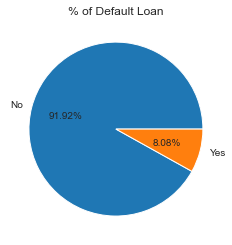

<Figure size 2160x2448 with 0 Axes>

In [562]:
plt.pie(autoloan_raw_df['Default'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Default Loan')
fig.set_figheight(10)
plt.figure(figsize=(30,34))
plt.show()

Around 8% of loans is defaulted, so it is an imbalanced dataset.

In [563]:
autoloan_raw_df['Default'].value_counts(normalize=True)

0    0.919208
1    0.080792
Name: Default, dtype: float64

In [564]:
autoloan_lib_raw_df = pd.read_csv(file_path_2,encoding='unicode_escape') 

Data library description is shown as below.

In [565]:
# let's take a look of the meaning of each columns
def left_align(df: DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df
left_align(autoloan_lib_raw_df)

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


# Visualization of Default by numerical features.

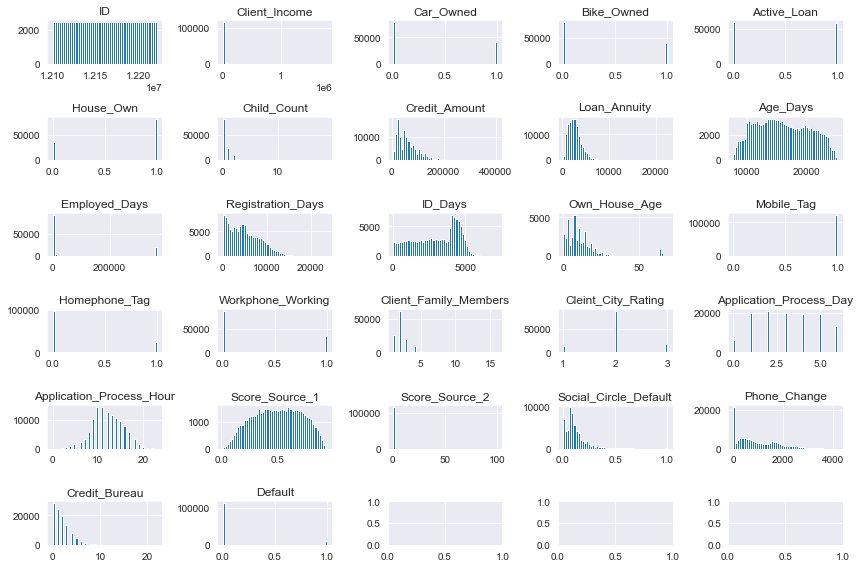

In [566]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

The histogram shows that outliers may exist with these
 variables:'Client_Income','Credit_Amount','Child_Count','Credit_Bureau','Own_House_Age', and 'Employed_Days'. Let's investagate further with a boxplot for these variables.

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Client_Income'>

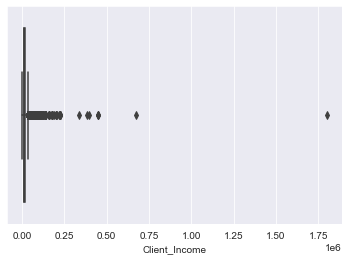

In [567]:
sns.boxplot(autoloan_raw_df['Client_Income'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Amount'>

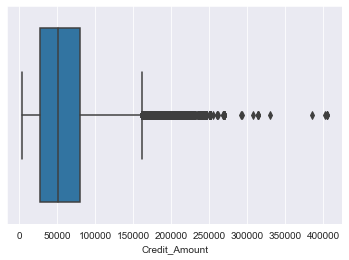

In [568]:
sns.boxplot(autoloan_raw_df['Credit_Amount'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Child_Count'>

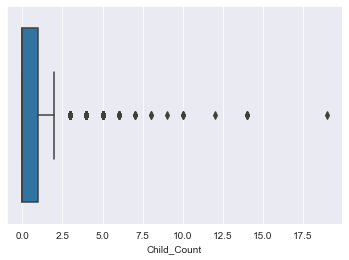

In [569]:
sns.boxplot(autoloan_raw_df['Child_Count'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Bureau'>

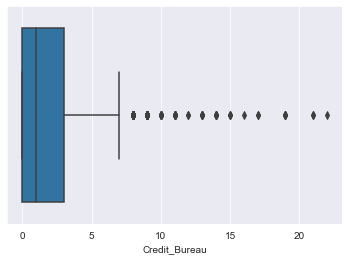

In [570]:
sns.boxplot(autoloan_raw_df['Credit_Bureau'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Own_House_Age'>

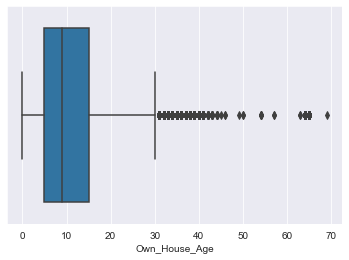

In [571]:
sns.boxplot(autoloan_raw_df['Own_House_Age'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employed_Days'>

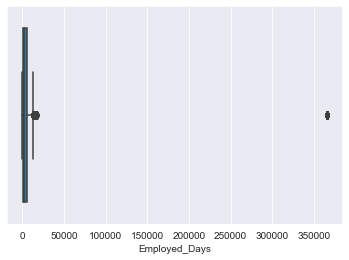

In [572]:
sns.boxplot(autoloan_raw_df['Employed_Days'])

Let's remove the outliers for these variables.

In [ ]:
Q1 = autoloan_raw_df['Client_Income'].quantile(q=.25)
Q3 = autoloan_raw_df['Client_Income'].quantile(q=.75)
IQR = autoloan_raw_df['Client_Income'].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(89,3)

In [573]:
high_bound = autoloan_raw_df['Client_Income'].quantile(0.99)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Client_Income'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 48150.0
low_bound : 3150.0


In [582]:
autoloan_raw_df['Client_Income'].shape

(116993,)

In [584]:
upper_points = np.where(high_bound)

In [585]:
autoloan_raw_df['Client_Income'].drop(upper_points[0], inplace=True)

In [586]:
autoloan_raw_df['Client_Income'].shape

(116993,)

In [578]:
from numpy import mean
from numpy import std

In [579]:
# calculate summary statistics
data_mean, data_std = mean(autoloan_raw_df['Client_Income']), std(autoloan_raw_df['Client_Income'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [581]:
autoloan_raw_df['Client_Income'] = [x for x in autoloan_raw_df['Client_Income'] if x >= lower and x <= upper]

ValueError: Length of values (115005) does not match length of index (116993)

In [574]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Client_Income']>=low_bound) & (autoloan_raw_df['Client_Income']<=high_bound)]

In [575]:
autoloan_raw_df.shape

(116993, 40)

In [576]:
high_bound = autoloan_raw_df['Credit_Amount'].quantile(0.99)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Amount'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 180000.0
low_bound : 4797.0


In [577]:
autoloan_raw_df.shape=autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Credit_Amount']>=low_bound) & (autoloan_raw_df['Credit_Amount']<=high_bound)]

C:\Users\eggfr\AppData\Local\Temp\ipykernel_7248\2271657274.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  autoloan_raw_df.shape=autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Credit_Amount']>=low_bound) & (autoloan_raw_df['Credit_Amount']<=high_bound)]


AttributeError: can't set attribute

In [ ]:
high_bound = autoloan_raw_df['Client_Income'].quantile(0.98)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Client_Income'].quantile(0.001)
print('low_bound :', low_bound)

In [ ]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Credit_Amount']>=low_bound) & (autoloan_raw_df['Credit_Amount']<=high_bound)]

In [ ]:
high_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.001)
print('low_bound :', low_bound)

In [ ]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Credit_Bureau']>=low_bound) & (autoloan_raw_df['Credit_Bureau']<=high_bound)]

In [ ]:
high_bound = autoloan_raw_df['Own_House_Age'].quantile(.99)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Own_House_Age'].quantile(0.001)
print('low_bound :', low_bound)

In [ ]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Own_House_Age']>=low_bound) & (autoloan_raw_df['Own_House_Age']<=high_bound)]

In [ ]:
autoloan_raw_df.shape

With further investigation, 10% of the employed_days is >300000 days. While this may be inaccurate, 10% of the data is significant. Hence, employed_days wont be dropped for outliers.

In [ ]:
high_bound = autoloan_raw_df['Employed_Days'].quantile(0.908)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Employed_Days'].quantile(0.001)
print('low_bound :', low_bound)

Removing the outliers

In [ ]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Credit_Amount']>=low_bound) & (autoloan_raw_df['Credit_Amount']<=high_bound)]

In [ ]:
autoloan_raw_df.head()

In [ ]:
plt.figure(figsize=(10,10))

cols_to_plot = ['Credit_Amount','Loan_Annuity','Employed_Days','Client_Income']
autoloan_raw_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

In [ ]:
autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Client_Income']>=low_bound) & (autoloan_raw_df['Client_Income']<=high_bound)]

In [ ]:
autoloan_raw_df.shape

In [ ]:
sns.boxplot(autoloan_raw_df['Client_Income'])

Correlation of between features.

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(autoloan_raw_df.corr(),annot = True)

# Visualization of Default status and Client Income and Credit Amount

In [ ]:
sns.scatterplot(autoloan_raw_df['Client_Income'], autoloan_raw_df['Credit_Amount'], hue=autoloan_raw_df['Default'])
plt.title('Default Status with Client Income and Credit Amount')
plt.figure(figsize=(22,20))
plt.show()

Let's take a look at the target data, and we see that we have an imbalanced dataset.

In [ ]:
#data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Train_Dataset.csv')
data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Train_Dataset.csv')

data["Default"].value_counts(normalize=True)

Let's seperate our feature variables and target variables, which is default.

In [ ]:
x = data.drop(["Default"], axis=1)
y = data["Default"]

Any data that's missing 3% data would consider random and will be filled with the most frequency in the pipeline.Client_Occupation, Credit_Bureau, ID_Days, Loan_Annuity, and Population_Region_Relative all have more than 3% missing data and will be filled with custom methods.Client_Occupation has 34% missing data. However, we don't want to drop it because it may give us vital information. Missing data will be filled with "other."

# Train Test Split

In the test_train split section, we will assign X as the features and y as the target, which is the ['Default'] variable. 

In [ ]:
def print_cv_scores(pipe, x, y):
    '''
    using given pipeline and prints the training and cross_val scores
    '''
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
    # This speeds up the processing
    with parallel_backend('threading', n_jobs=-1):
        # Pass in pipe to cross validate along with a feature list; keep standard 5-fold cross-validation
        results = cross_validate(pipe, x, y, cv=5, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Precision: {round(results['train_precision_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Precision: {round(results['test_precision_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Recall: {round(results['train_recall_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Recall: {round(results['test_recall_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro F1 Score: {round(results['train_f1_macro'].mean(), 6)}")
    print(f"Cross_Val Macro F1 Score: {round(results['test_f1_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro AUC Score: {round(results['train_roc_auc_ovr'].mean(), 6)}")
    print(f"Cross_Val Macro AUC Score: {round(results['test_roc_auc_ovr'].mean(), 6)}")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create Column Transformer to Preprocess Data

Let's set up a column transformer first. This columntransformer is made up 5 different pipelines. They are first imputed with the data as disccused in the EDA sections. For categorical variables, it will be transformed with either one hot encoder or ordinal encorder. Then, they will be all set up in the columntransformer.  

In [ ]:
#Lets Set up the column transformer
Client_Education_list = ['Junior secondary','Secondary','Graduation dropout','Graduation','Post Grad']
Client_Marital_Status_list = ['D','W','M','S']
ohe_cols = ['Accompany_Client','Client_Income_Type','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Application_Process_Day','Application_Process_Hour']
num_cols = list(x.select_dtypes(['int', 'float']).columns)

nominal_Client_Occupation_pipeline = Pipeline([
    ('onehotimputer',SimpleImputer(strategy = 'constant',fill_value= "Other") ),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

numeric_pipeline = Pipeline([
    ('numimputer', SimpleImputer(strategy = 'mean')), 
    ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False,handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

ordinal_Client_Marital_Status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Marital_Status_list])),
    ('ordnorm', StandardScaler())])

ordinal_Client_Education_pipeline = Pipeline([
     ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Education_list])),
     ('ordnorm', StandardScaler())])

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_Client_Education_pipeline, ['Client_Education']),
       ("ordinalpipe2", ordinal_Client_Marital_Status_pipeline, ['Client_Marital_Status']),
       ("nominalpipe", nominal_pipeline,ohe_cols),
       ("nominalpipe2", nominal_Client_Occupation_pipeline,['Client_Occupation']),
       ("numpipe", numeric_pipeline, num_cols)])

# Pipeline and Baseline Model

We use SMOTE to oversample our data. However, SMOTE doesn't work if we only use 1 sklearn pipeline as it doesn't has the fit_transfrom function. We have to break it into 2 different pipelines. One for preprocessing data with column transformer and SMOTE, and the other is for the modeling pipeline. Standscaler is used to scaled the data after SMOTE. PCA is used for feature selection at .9.

In [ ]:
# Need to seperate 2 pipelines
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))
                    ])  #setup preprocessing pipeline

baseline_pipe = Pipeline([
                          
                          ('classifier', DummyClassifier(strategy='most_frequent'))]) #set up model pipeline

In [ ]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

Let's check to see if our y_train data is balanced.

In [ ]:
print(y_resampled.value_counts())

That's 50-50 for both classes instead of 92%-8%.

In [ ]:
print_cv_scores(baseline_pipe, x_resampled, y_resampled.values.ravel())

In [ ]:
 baseline_pipe.fit(x_resampled, y_resampled)  #train the baseline model

We also need to transfrom x_test_data.

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #transform x_test_data

In [ ]:
y_pred0 = baseline_pipe.predict(x_test_processed) #baseline model prediction

In [ ]:
#plot the confusion matrix
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(baseline_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred0)
acc = accuracy_score(y_test, y_pred0)
prec = precision_score(y_test, y_pred0)
rec = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)

sum_results = pd.DataFrame([['Baseline', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
sum_results

Baseline model achieve 92% accuracy as there is 92% normal cases. However, it doesn't do well as it has 0% in precision and recall.

# Logistic Regression

Let's do a regular Regression Model.

In [ ]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

In [ ]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [ ]:
print_cv_scores(logreg_pipe, x_resampled, y_resampled.values.ravel())

In [ ]:
logreg_pipe.fit(x_resampled, y_resampled)  #train the logreg model

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [ ]:
y_pred1 = logreg_pipe.predict(x_test_processed) #prediction

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred1)
print(baseline_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred1)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

Even though our cross validation has a decent score, we still have a really poor F1 score when we compare to our test set.

In [ ]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

Data need to fed into preprocessing pipeline first before GridSearch

In [ ]:
#x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #preprocessing for x_test

Going to optimize regulation strength and maximum number of iteraion to improve the model performance.

In [ ]:
#pipe_grid = {'logreg__C': [10, 15, 20], 
#              'logreg__max_iter': [200, 300]
         
#            }

#model_2_gs_pipe = GridSearchCV(estimator= logreg_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=3,  # 3-fold cross-validation
#                             scoring= "roc_auc",
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for    
#with parallel_backend('threading', n_jobs=-1):
#        model_2_gs_pipe.fit(x_resampled, y_resampled)

In [ ]:
# Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
#with open('model_2_gs_pipe.pkl', 'wb') as f:
#     joblib.dump(model_2_gs_pipe, f)

In [ ]:
# Load in pickled object
with open('model_2_gs_pipe.pkl', 'rb') as f:
    model_2_gs_pipe = joblib.load(f)

In [ ]:
optimal_C = model_2_gs_pipe.best_params_['logreg__C']
optimal_max_iter = model_2_gs_pipe.best_params_['logreg__max_iter']
logreg2_pipe = Pipeline([
                        ('logreg', LogisticRegression(C=optimal_C, max_iter=optimal_max_iter,random_state=42))]) #set up logestic regression w the best parameter
logreg2_pipe.fit(x_resampled, y_resampled)

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [ ]:
y_pred2 = logreg2_pipe.predict(x_test_processed) #prediction

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression GS')
plt.show()

LogisticRegressionGS_classification_report = classification_report(y_test, y_pred2)
print(LogisticRegressionGS_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

results = pd.DataFrame([['Logistic Regression GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

There is not much improvement on the logistic regression gridsearch model. We are going to move on to the decision tree model.

# Decision Tree

In [ ]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline   

dt_pipe = Pipeline([
                    
                    ('dt', DecisionTreeClassifier(random_state=42))]) #set up model pipeline  


In [ ]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [ ]:
print_cv_scores(dt_pipe, x_resampled, y_resampled.values.ravel())

In [ ]:
dt_pipe.fit(x_resampled, y_resampled)  #train the DT model

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [ ]:
y_pred3 = dt_pipe.predict(x_test_processed) #prediction

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred3)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

In [ ]:
#pipe_grid = {    
#              'dt__min_samples_leaf': [5, 6, 7], #minimum number of samples required in the leaf mode
#              'dt__max_features': [10, 20, 30]} #number of features to decide on next split to prevent overfittinh

#model_dt_gs_pipe = GridSearchCV(estimator= dt_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5,  # 5-fold cross-validation
#                             scoring= "roc_auc",
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
#with parallel_backend('threading', n_jobs=-1):
 #    model_dt_gs_pipe.fit(x_resampled, y_resampled)

In [ ]:
##Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
#with open('model_dt_gs_pipe.pkl', 'wb') as f:
#     joblib.dump(model_dt_gs_pipe, f)

In [ ]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_dt_gs_pipe = joblib.load(f)

In [ ]:
optimal_min_samples_leaf = model_dt_gs_pipe.best_params_['dt__min_samples_leaf']
optimal_max_features = model_dt_gs_pipe.best_params_['dt__max_features']
dt2_pipe = Pipeline([
                        ('dt',DecisionTreeClassifier(min_samples_leaf = optimal_min_samples_leaf, max_features=optimal_max_features, random_state=42))]) #set up logestic regression w the best parameter
dt2_pipe.fit(x_resampled, y_resampled)

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [ ]:
y_pred4 = dt_pipe.predict(x_test_processed) #prediction

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred4)
print(dt_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Decision Tree GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

# Random forest

In [ ]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

rf_pipe = Pipeline([
                     
                     ('rf_clf', RandomForestClassifier(random_state=42))]) #set up model pipeline

In [ ]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [ ]:
print_cv_scores(rf_pipe, x_resampled, y_resampled.values.ravel())

In [ ]:
rf_pipe.fit(x_resampled, y_resampled)  #train the RF model

In [ ]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [ ]:
y_pred4 = rf_pipe.predict(x_test_processed) # rf prediction

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(rf_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_classification_report = classification_report(y_test, y_pred4)
print(rf_classification_report)

In [ ]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Random Forrest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

In [ ]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

In [ ]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'train_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

Neural Network_baseline

In [588]:
model_nn_base = Sequential()
model_nn_base.add(Dense(16, input_shape=(97,), activation='relu')),
#model_24.add(Dropout(0.2)),
#model_24.add(Dense(32, activation='relu')),
#model_24.add(Dropout(0.2)),
#model_24.add(Dense(64, activation='relu')),
model_nn_base.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_base.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_base.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                1568      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________


In [589]:
# terminate training if doesnt improve on specified min_delta for 5 epochs
earlystopper = EarlyStopping(monitor='accuracy', min_delta = 1e-2, patience = 5)

In [590]:
results_nn_base = model_nn_base.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    #validation_data=(x_validate, y_validate),
                    #class_weight=sklearn_weights,
                    callbacks = [earlystopper])

Epoch 1/10
30460/30460 [==============================] - 104s 3ms/step - loss: 0.5924 - tp: 50747.0000 - fp: 19163.0000 - tn: 70423.0000 - fn: 38839.0000 - accuracy: 0.6763 - precision: 0.7259 - recall: 0.5665 - auc: 0.7516 - prc: 0.7514 - val_loss: 0.7445 - val_tp: 15866.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 11010.0000 - val_accuracy: 0.5903 - val_precision: 1.0000 - val_recall: 0.5903 - val_auc: 0.0000e+00 - val_prc: 1.0000ion: 0.7317 - recall: 0.5 - E
Epoch 2/10
30460/30460 [==============================] - 120s 4ms/step - loss: 0.5642 - tp: 37551.0000 - fp: 18559.0000 - tn: 71027.0000 - fn: 25159.0000 - accuracy: 0.7129 - precision: 0.6692 - recall: 0.5988 - auc: 0.7771 - prc: 0.6824 - val_loss: 0.6917 - val_tp: 17220.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 9656.0000 - val_accuracy: 0.6407 - val_precision: 1.0000 - val_recall: 0.6407 - val_auc: 0.0000e+00 - val_prc: 1.0000ion: 0.6739 - recall: 0.5975 - auc: 0.7795 - prc:  - ETA: 1:35 - loss: 0.

In [ ]:
#Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_nn_base.pkl', 'wb') as f:
     joblib.dump(model_nn_base, f)

In [ ]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_nn_base = joblib.load(f)

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(model_nn_base,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - NN Network')
plt.show()

nn_base_classification_report = classification_report(y_test, y_pred_nn_base)
print(nn_base_classification_report)

In [ ]:
visualize_training_results(results_nn_base)

In [587]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Add l1 regulaizer

In [ ]:
from keras.regularizers import l1, l2

In [ ]:
# establish the regularization strength of lambda
reg_l1 = l1(3e-3) # 1e-5 to .1

In [ ]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [ ]:
model_nn_l1 = Sequential()
model_nn_l1.add(Dense(16, input_shape=(97,), activation='relu')),
#model_24.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, activation='relu')),
model_nn_l1.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, 
                     activation='relu',
                     kernel_regularizer = reg_l1)),
model_nn_l1.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_l1.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_l1.summary()

In [ ]:
results_nn_l1 = model_nn_l1.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    #validation_data=(x_validate, y_validate),
                    #class_weight=sklearn_weights,
                    callbacks = [earlystopper])


In [ ]:
visualize_training_results(results_nn_l1)